# Adversarial Search: Playing Connect 4


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state

In [3]:
# Your code/answer goes here.

How big is the state space? Give an estimate and explain it.

In [4]:
# Your code/ answer goes here.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [5]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [2 point]

Use a numpy character array as the board.

In [6]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [7]:
import numpy as np

def custom_board(x,y):
    shape=(x, y)
    return np.full(shape=shape, fill_value=0)

print(custom_board(4,4))

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position and player is the player whose next move it is and who the agent should play.

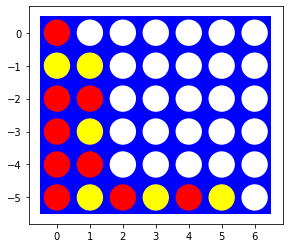

In [8]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[1, 0, 0, 0, 0, 0, 0],
         [-1, -1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0],
         [1, -1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0],
         [1, -1, 1, -1, 1, -1, 0]]
visualize(board)

In [9]:
print(len(board))
print(len(board[0]))

6
7


Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

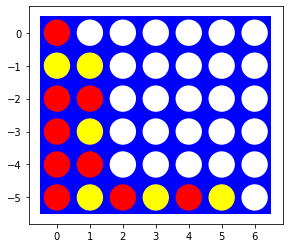

[(0, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 6)]
False


In [10]:
# Your code/ answer goes here.
def result(state, player, action):
    if(state[action[0]][action[1]] != 0):
        print("Error: Illegal move!")
        print(action)
        #visualize(state)
        return state
    
    state = np.copy(state)
    state[action[0]][action[1]] = int(player)
        
    return state
    
def actions(state):
    actions = []
    rows = len(state)
    cols = len(state[0])
    for col in range(cols):
        for row in range(rows):
            i = state[row][col]
            #print(row,col)
            if(row == 0 and i != 0):
                break
            if(i == 1 or i == -1):
                thistuple = (row-1,col)
                actions.append(thistuple)
                break
            if(row == (rows-1) and i == 0):
                thistuple = (row,col)
                actions.append(thistuple)
            
    return actions
        
    
def check_board(state):
    rows = len(state)
    cols = len(state[0])
    
    for col in range(cols -3):
        for row in range(rows):
            tile1 = state[row][col]
            tile2 = state[row][col+1]
            tile3 = state[row][col+2]
            tile4 = state[row][col+3]
            if tile1 == tile2 == tile3 == tile4 == 1:
                return 1
            if  tile1 == tile2 == tile3 == tile4 == -1:
                return -1
    
    for col in range(cols):
        for row in range(rows -3):
            tile1 = state[row][col]
            tile2 = state[row+1][col]
            tile3 = state[row+2][col]
            tile4 = state[row+3][col]
            if tile1 == tile2 == tile3 == tile4 == 1:
                return 1
            if  tile1 == tile2 == tile3 == tile4 == -1:
                return -1
    
    for col in range(cols-3):
        for row in range(rows -3):
            tile1 = state[row][col]
            tile2 = state[row+1][col+1]
            tile3 = state[row+2][col+2]
            tile4 = state[row+3][col+3]
            if tile1 == tile2 == tile3 == tile4 == 1:
                return 1
            if  tile1 == tile2 == tile3 == tile4 == -1:
                return -1
            
            tile1 = state[row][col+3]
            tile2 = state[row+1][col+2]
            tile3 = state[row+2][col+1]
            tile4 = state[row+3][col]
            if tile1 == tile2 == tile3 == tile4 == 1:
                return 1
            if  tile1 == tile2 == tile3 == tile4 == -1:
                return -1
            
    counter = 0
    for col in range(cols):
        i = state[0][col]
        if(i != 0):
            counter += 1
        elif(i == 0):
            return 'n'
            break
        if((counter+1) == cols):
            return 'd'
            
    return 'n'

def terminal(state, player = '1', draw_is_win = True):
    if player == '1': other = '-1'
    else: other = '1'
    
    goal = check_board(state)
    #print(goal)
    if goal == False:
        rows = len(state)
        cols = len(state[0])
        counter = 0
        for col in range(cols):
            i = state[0][col]
            if(i != 0):
                counter += 1
            elif(i == 0):
                goal = 'n'
                break
        if((counter+1) == cols):
            goal = 'd'
        
                
    if goal == player: return 'win'
    if goal == 'd':
        if draw_is_win: return 'draw'
        else: return None
        
    if goal == other: return None
    return False
    
def utility(state, player = '1'):
    goal = check_board(state)
    if goal == False:
        rows = len(state)
        cols = len(state[0])
        counter = 0
        for col in range(cols):
            i = state[0][col]
            if(i != 0):
                counter += 1
            elif(i == 0):
                goal = 'n'
                break
        if((counter+1) == cols):
            goal = 'd'
            
    if str(goal) == player: return +1
    if goal == 'd': return 0
    if str(goal) == other(player): return -1
    return None

def other(player): 
    if player == '1': return '-1'
    else: return '1'
    
visualize(board)
action = actions(board)
print(action)
print(terminal(board))

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on bt yhe environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [11]:
# Your code/ answer goes here.
import random
def random_player(state, player = '1'):
    action = actions(state)
    return random.choice(action)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [12]:
# Your code/ answer goes here.
def switch_player(player, x, o):
    if player == '1':
        return '-1', o
    else:
        return '1', x

def play(x, o, N = 100):
    """Let two agents play each other N times. x starts. x and y are agent functions that 
    get the board as the percept and return their next action."""
    results = {'1': 0, '-1': 0, 'd': 0}
    
    for i in range(N):
        test_board = empty_board()
        player, fun = '1', x
        while True:
            a = fun(test_board, player)
            #print(a)
            test_board = result(test_board, player, a)
            #visualize(test_board)
            win = check_board(test_board)   # returns the 'n' if the game is not done.

            if str(win) != 'n':
                results[str(win)] += 1
                break
            
            player, fun = switch_player(player, x, o)   
    
    return results

In [13]:
%time display(play(random_player, random_player, N = 100))

{'1': 46, '-1': 53, 'd': 1}

CPU times: total: 188 ms
Wall time: 185 ms


## Task 3: Minimax Search with Alpha-Beta Pruning [4 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [14]:
# Your code/ answer goes here.
def minimax_search(board, player = '1'):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value(board, player)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
 
    return { "move": move, "value": value}

def max_value(state, player):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state if it is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("max in: " + str(state) + str([v]) ) 
    if v is not None: return v, None
        
    v, move = -math.inf, None

    # check all possible actions in the state, return move with the largest value
    for a in actions(state):
        #print(a)
        v2, a2 = min_value(result(state, player, a), player)
        if v2 > v:
            v, move = v2, a
    
    if DEBUG >= 2: print("max out: " + str(state) + str([v, move]) ) 
    return v, move

def min_value(state, player):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state if it is a terminal state
    v = utility(state, player)
    if DEBUG >= 2: print("min in: " + str(state) + str([v]) ) 
    if v is not None: return v, None
    
    v, move = +math.inf, None

    # check all possible actions in the state, return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value(result(state, other(player), a), player)
        if v2 < v:
            v, move = v2, a
    
    if DEBUG >= 2: print("min out: " + str(state) + str([v, move]) ) 
    return v, move

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

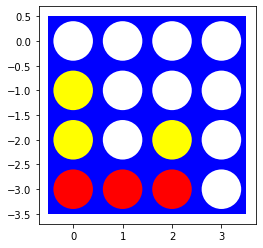

Number of nodes searched: 8732


{'move': (3, 3), 'value': 1}

CPU times: total: 141 ms
Wall time: 138 ms


In [15]:
# Your code/ answer goes here.
import math
board = custom_board(4,4)
board[3][0] = 1
board[3][1] = 1
board[3][2] = 1
board[2][0] = -1
board[2][2] = -1
board[1][0] = -1
visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

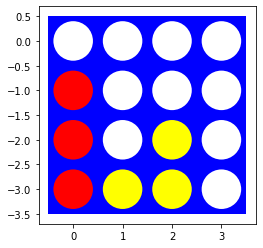

Number of nodes searched: 13783


{'move': (0, 0), 'value': 1}

CPU times: total: 203 ms
Wall time: 203 ms


In [16]:
board = custom_board(4,4)
board[3][0] = 1
board[3][1] = -1
board[3][2] = -1
board[2][0] = 1
board[2][2] = -1
board[1][0] = 1
visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

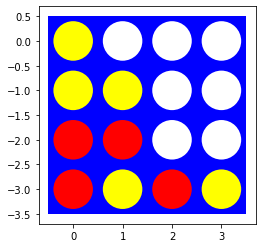

Number of nodes searched: 135


{'move': (2, 2), 'value': 0}

CPU times: total: 0 ns
Wall time: 2.98 ms


In [17]:
board =  [[-1, 0, 0, 0],
         [-1, -1, 0, 0],
         [1, 1, 0, 0],
         [1, -1, 1, -1]]

visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

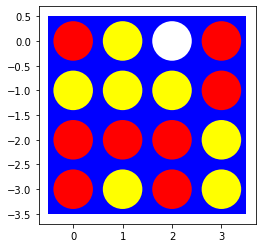

Number of nodes searched: 2


{'move': (0, 2), 'value': 0}

CPU times: total: 0 ns
Wall time: 1.34 ms


In [18]:
board =  [[1,-1, 0, 1],
         [-1, -1, -1, 1],
         [1, 1, 1, -1],
         [1, -1, 1, -1]]

visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

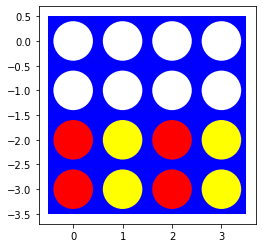

Number of nodes searched: 4463


{'move': (1, 0), 'value': 0}

CPU times: total: 78.1 ms
Wall time: 68.3 ms


In [19]:
board =  [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, 1, -1],
         [1, -1, 1, -1]]

visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

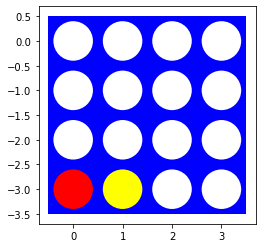

Number of nodes searched: 7750458


{'move': (2, 0), 'value': 0}

CPU times: total: 1min 54s
Wall time: 1min 55s


In [18]:
# Your code/ answer goes here.
board =  [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, 0, 0]]

visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [20]:
# Your code/ answer goes here.
def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    z = [x for _, x in sorted(zipped_pairs)]
 
    return z

def actions(state):
    actions = []
    rows = len(state)
    cols = len(state[0])
    for col in range(cols):
        for row in range(rows):
            i = state[row][col]
            #print(row,col)
            if(row == 0 and i != 0):
                break
            if(i == 1 or i == -1):
                thistuple = (row-1,col)
                actions.append(thistuple)
                break
            if(row == (rows-1) and i == 0):
                thistuple = (row,col)
                actions.append(thistuple)
                
    priority =  [[1, 0, 0, 1],
                 [0, 2, 2, 0],
                 [0, 2, 2, 0],
                 [1, 0, 0, 1]]
    priority = [(1,1),(2,1),(1,2),(2,2),(0,0),(3,0),(0,3),(3,3)]
    
    #print(sort_list(actions, priority))
    
    actions =[a for _,a in sorted(zip(priority,actions), reverse=True)]
            
    return actions

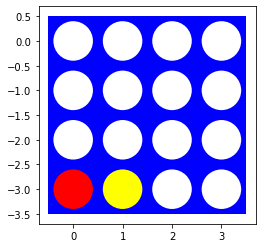

In [ ]:
board =  [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [1, -1, 0, 0]]

visualize(board)

DEBUG = 1
COUNT = 0
%time display(minimax_search(board))

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [ ]:
# Your code/ answer goes here.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search [3 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [ ]:
# Your code/ answer goes here.

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [+ 1 bonus point]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above. 

In [ ]:
# Your code/ answer goes here.

### Best First Move

How would you determine what the best first move is? You can use Pure Monte Carlo Search or any algorithms 
that you have implemented above.

In [ ]:
# Your code/ answer goes here.